In [1]:
from keras import backend as K
from model import *
import numpy as np
import cv2
import os
IMAGE_SIZE = 299

# If you want to use a GPU set its index here
os.environ['CUDA_VISIBLE_DEVICES'] = '1,2,3'


# This function comes from Google's ImageNet Preprocessing Script
def central_crop(image, central_fraction):
    """Crop the central region of the image.
    Remove the outer parts of an image but retain the central region of the image
    along each dimension. If we specify central_fraction = 0.5, this function
    returns the region marked with "X" in the below diagram.
       --------
      |        |
      |  XXXX  |
      |  XXXX  |
      |        |   where "X" is the central 50% of the image.
       --------
    Args:
    image: 3-D array of shape [height, width, depth]
    central_fraction: float (0, 1], fraction of size to crop
    Raises:
    ValueError: if central_crop_fraction is not within (0, 1].
    Returns:
    3-D array
    """
    if central_fraction <= 0.0 or central_fraction > 1.0:
        raise ValueError('central_fraction must be within (0, 1]')
    if central_fraction == 1.0:
        return image

    img_shape = image.shape
    depth = img_shape[2]
    fraction_offset = int(1 / ((1 - central_fraction) / 2.0))
    bbox_h_start = int(np.divide(img_shape[0], fraction_offset))
    bbox_w_start = int(np.divide(img_shape[1], fraction_offset))

    bbox_h_size = int(img_shape[0] - bbox_h_start * 2)
    bbox_w_size = int(img_shape[1] - bbox_w_start * 2)

    image = image[bbox_h_start:bbox_h_start+bbox_h_size, bbox_w_start:bbox_w_start+bbox_w_size]
    return image


def get_processed_image(img_path):
    # Load image and convert from BGR to RGB
    im = np.asarray(cv2.imread(img_path))[:,:,::-1]
    im = central_crop(im, 0.875)
    im = cv2.resize(im, (299, 299))
#     im = preprocess_input(im)
    if K.image_data_format() == "channels_first":
        im = np.transpose(im, (2,0,1))
        im = im.reshape(-1,3,299,299)
    else:
        im = im.reshape(-1,299,299,3)
    return im



/home/wonjae/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import numpy as np
import scipy.io as scio    
import os,re
from PIL import Image
from scipy import ndimage
from matplotlib import pyplot as plt

In [5]:
import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1,2,3"

In [6]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [7]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [8]:
def get_filenames(path):
    filenames = []
    for root, dirnames, filenames in os.walk(path):
        print("---root----")
        print(root)
        print("----dirnames---")
        print(dirnames)
        print("----filenames---")
        print(filenames)
#         filenames.sort(key = natural_keys)
        rootpath = root
        return filenames
    print(len(filenames))
    return filenames

In [9]:
root_path = "/home/wonjae/YongHyeok/Classification_TASK3/dataset/ISIC2018_Task3_Validation_Input/"

In [21]:
filenames_val = get_filenames(root_path)

---root----
/home/wonjae/YongHyeok/Classification_TASK3/dataset/ISIC2018_Task3_Validation_Input/
----dirnames---
['.ipynb_checkpoints', 'Untitled Folder']
----filenames---
['ISIC_0034467.jpg', 'ISIC_0034514.jpg', 'ISIC_0034474.jpg', 'ISIC_0034502.jpg', 'ISIC_0034444.jpg', 'ISIC_0034491.jpg', 'ISIC_0034426.jpg', 'ISIC_0034394.jpg', 'ISIC_0034403.jpg', 'ISIC_0034349.jpg', 'ISIC_0034463.jpg', 'ISIC_0034430.jpg', 'ISIC_0034382.jpg', 'ISIC_0034480.jpg', 'ISIC_0034350.jpg', 'ISIC_0034517.jpg', 'ISIC_0034375.jpg', 'ISIC_0034464.jpg', 'ISIC_0034520.jpg', 'ISIC_0034354.jpg', 'ISIC_0034508.jpg', 'ISIC_0034475.jpg', 'ISIC_0034455.jpg', 'ISIC_0034356.jpg', 'ISIC_0034499.jpg', 'ISIC_0034451.jpg', 'ISIC_0034519.jpg', 'ISIC_0034483.jpg', 'ISIC_0034460.jpg', 'ISIC_0034471.jpg', 'ISIC_0034362.jpg', 'ISIC_0034484.jpg', 'ISIC_0034436.jpg', 'ISIC_0034410.jpg', 'ISIC_0034325.jpg', 'ISIC_0034366.jpg', 'ISIC_0034381.jpg', 'ISIC_0034359.jpg', 'ISIC_0034361.jpg', 'ISIC_0034369.jpg', 'ISIC_0034493.jpg', 'ISIC_0

In [22]:
np.save('filenames_val.npy',filenames_val)

In [12]:


# Create model and load pre-trained weights
model = inception_v4(num_classes=1001, dropout_keep_prob=0.2, weights=None, include_top=True)
model.layers.pop()
model.outputs = model.layers[-1].output
model.layers[-1].outbound_nodes = []
x = Dense(7, activation='softmax')(model.outputs)
model = Model(inputs=model.input, outputs=x)


In [13]:
model = multi_gpu_model(model, gpus=3)


In [15]:
model.load_weights('/home/wonjae/YongHyeok/Classification_TASK3/Inception4_classsn_lr_065_2o2_60ep.hdf5', by_name=True)


In [24]:
img_val=np.load('filenames_val.npy')

In [17]:
img_val[0]

'ISIC_0034467.jpg'

In [25]:
 # make a train_image file with matplotlib.pyplot.imread
import matplotlib
from matplotlib import pyplot
train_images = []
for file in img_val:
    train_images.append(matplotlib.pyplot.imread('/home/wonjae/YongHyeok/Classification_TASK3/dataset/ISIC2018_Task3_Validation_Input/'+file))

In [26]:
a=np.array([])
for i in range(len(train_images)):
    im = train_images[i]
    im = central_crop(im, 0.875)
    im = cv2.resize(im, (299, 299))
    a = np.append(a,im)

In [27]:
a=np.reshape(a,(193,299,299,3))

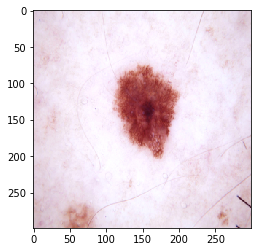

In [28]:
a[0].shape
v = np.array(a,np.uint16)
plt.imshow(v[0], cmap = "gray")


In [29]:
val_mean = np.mean(v,axis = (0,1,2,3))
val_std = np.std(v,axis = (0,1,2,3))
val_images_norm = (v - val_mean)/(val_std+1e-7)

In [30]:

# Open Class labels dictionary. (human readable label given ID)
# classes = eval(open('validation_utils/class_names.txt', 'r').read())

# Load test image!
# for file in ISIC2018_Task3_Validation_Input

# for i in range(len(img_val)):
#     img_path = '/home/wonjae/Classification_inception_v4/ISIC2018_Task3_Validation_Input/'+img_val[i]
#     img = np.append(img,get_processed_image(img_path))
k = 0
preds = model.predict(val_images_norm)
for i in range(len(img_val)):
#     plt.imshow(v[i], cmap = "gray")
#     plt.show()
#     print(np.argmax(preds[i]))
#     print(np.max(preds[i]))
    if np.max(preds[i])>0.499 :
        k += 1
# Run prediction on test image
# preds = model.predict(img)
# print(np.argmax(preds))
# print(preds)
print(k)


# just leave the predition value despite max prediction is not over than 0.5

177


In [ ]:

for i in range(len(img_val)):
    for j in range(7):
        if j != np.argmax(preds[i]) :
            preds[i][j]='0.0'
        else :
            preds[i][j]='1.0'

In [ ]:
k=0
for i in range(len(img_val)):
#     plt.imshow(v[i], cmap = "gray")
#     plt.show()
#     print(np.argmax(preds[i]))
#     print(np.max(preds[i]))
    if np.max(preds[i])>0.499 :
        k += 1
# Run prediction on test image
# preds = model.predict(img)
# print(np.argmax(preds))
# print(preds)
print(k)

In [ ]:
preds.shape

In [ ]:
foo=np.zeros((7))

In [ ]:
hi=h[:,:]

In [ ]:
foo=h.sum(axis=0)

In [ ]:
foo

In [ ]:
foo/193*100

In [31]:
import numpy as np
myarray = np.asarray(filenames_val)

In [32]:
myarray=np.reshape(myarray,(193))

In [33]:
for i in range(len(myarray)):
    myarray[i]=myarray[i][:12]

In [34]:
myarray.shape

(193,)

In [35]:
pred__ = np.zeros((193,8))

In [36]:
pred__.shape

(193, 8)

In [37]:
pred__[:,1:]=preds

In [38]:
pred__=pred__.astype(str)

In [39]:
pred__[:,0]=myarray

In [40]:
pred__

array([['ISIC_0034467', '0.7074973583221436', '0.25744014978408813', ...,
        '0.014969739131629467', '0.007482626941055059',
        '0.0017209522193297744'],
       ['ISIC_0034514', '0.09024324268102646', '0.8786753416061401', ...,
        '0.014690257608890533', '0.005368873011320829',
        '0.0021727292332798243'],
       ['ISIC_0034474', '0.17867836356163025', '0.8002909421920776', ...,
        '0.02002294361591339', '0.0003683390386868268',
        '0.00022302391880657524'],
       ...,
       ['ISIC_0034380', '0.00010830008250195533', '0.9993841648101807',
        ..., '0.00037500212783925235', '8.885595161700621e-05',
        '1.9844204871333204e-05'],
       ['ISIC_0034419', '0.04961712658405304', '0.5272523760795593', ...,
        '0.0009056693525053561', '0.004240785259753466',
        '0.35470905900001526'],
       ['ISIC_0034377', '0.0006082528852857649', '0.994901180267334',
        ..., '0.0034786995965987444', '0.0005123580922372639',
        '0.00027388197486288

In [41]:
pred__=np.append((['image','MEL','NV','BCC','AKIEC','BKL','DF','VASC']),pred__)

In [42]:
pred__

array(['image', 'MEL', 'NV', ..., '0.0034786995965987444',
       '0.0005123580922372639', '0.00027388197486288846'], dtype='|S32')

In [43]:
pred__=np.reshape(pred__,(194,8))

In [44]:
pred__

array([['image', 'MEL', 'NV', ..., 'BKL', 'DF', 'VASC'],
       ['ISIC_0034467', '0.7074973583221436', '0.25744014978408813', ...,
        '0.014969739131629467', '0.007482626941055059',
        '0.0017209522193297744'],
       ['ISIC_0034514', '0.09024324268102646', '0.8786753416061401', ...,
        '0.014690257608890533', '0.005368873011320829',
        '0.0021727292332798243'],
       ...,
       ['ISIC_0034380', '0.00010830008250195533', '0.9993841648101807',
        ..., '0.00037500212783925235', '8.885595161700621e-05',
        '1.9844204871333204e-05'],
       ['ISIC_0034419', '0.04961712658405304', '0.5272523760795593', ...,
        '0.0009056693525053561', '0.004240785259753466',
        '0.35470905900001526'],
       ['ISIC_0034377', '0.0006082528852857649', '0.994901180267334',
        ..., '0.0034786995965987444', '0.0005123580922372639',
        '0.00027388197486288846']], dtype='|S32')

In [45]:
 # save the prediction numpy array to csv

import csv
 
myFile = open('Validation_to1_lr_065_6060ep.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(pred__)
     
print("Writing complete")

Writing complete


In [ ]:
import numpy as np
from scipy import ndimage
# NOTE
# Images are assumed to be uint8 0-255 valued.
# For augment function:
#   images shape: (batch_size, height, width, channels=3)
#   labels shape: (batch_size, 3)
def addBlotch(image, max_dims=[0.2,0.2]):
    #add's small black/white box randomly in periphery of image
    new_image = np.copy(image)
    shape = new_image.shape
    max_x = shape[0] * max_dims[0]
    max_y = shape[1] * max_dims[1]
    rand_x = 0
    rand_y = np.random.randint(low=0, high=shape[1])
    rand_bool = np.random.randint(0,2)
    if rand_bool == 0:
        rand_x = np.random.randint(low=0, high=max_x)
    else:
        rand_x = np.random.randint(low=(shape[0]-max_x), high=shape[0])
    size = np.random.randint(low=1, high=7) #size of each side of box
    new_image[rand_x:(size+rand_x), rand_y:(size+rand_y), :] = np.random.randint(0,256)
    return new_image

def shift(image, max_amt=0.2):
    new_img = np.copy(image)
    shape = new_img.shape
    max_x = int(shape[0] * max_amt)
    max_y = int(shape[1] * max_amt)
    x = np.random.randint(low=-max_x, high=max_x)
    y = np.random.randint(low=-max_y, high=max_y)
    return ndimage.interpolation.shift(new_img,shift=[x,y,0])

def addNoise(image, amt=0.005):
    noise_mask = np.random.poisson(image / 255.0 * amt) / amt * 255
    noisy_img = image + (noise_mask)
    return np.array(np.clip(noisy_img, a_min=0., a_max=255.), dtype=np.uint8)

def rotate(image):
    randnum = np.random.randint(1,360)
    new_image = np.copy(image)
    return ndimage.rotate(new_image, angle=randnum, reshape=False)

#randomly manipulates image
#rotate, flip along axis, add blotch, shift
def augment(images, labels=None, amplify=2):
    # INPUT:
    #images shape: (batch_size, height, width, channels=3)
    #labels shape: (batch_size, 3)
#     ops = {
#         0: addBlotch,
#         1: shift,
#         2: addNoise,
#         3: rotate
#     }
    ops = {
        0: shift,
        1: rotate,
    }

    shape = images.shape
    new_images = np.zeros(((amplify*shape[0]), shape[1], shape[2], shape[3]))
    if labels is not None:
        new_labels = np.zeros(((amplify*shape[0]), 7))
    for i in range(images.shape[0]):
        cur_img = np.copy(images[i])
        new_images[i] = cur_img
        if labels is not None:
            new_labels[i] = np.copy(labels[i])
        for j in range(1, amplify):
            add_r = ( j * shape[0] )
            which_op = np.random.randint(low=0, high=1)
            dup_img = np.zeros((1,shape[1], shape[2], shape[3]))
            new_images[i+add_r] = ops[which_op](cur_img)
            if labels is not None:
                new_labels[i+add_r] = np.copy(labels[i])
    if labels is not None:
        return new_images.astype(np.uint8), new_labels.astype(np.uint8)
    else:
        return new_images.astype(np.uint8)

In [ ]:
v_aug=augment(v,amplify=4)

In [ ]:
v_aug.shape

In [ ]:
val_aug_mean = np.mean(v_aug,axis = (0,1,2,3))
val_aug_std = np.std(v_aug,axis = (0,1,2,3))
val_images_aug_norm = (v_aug - val_aug_mean)/(val_aug_std+1e-7)

In [ ]:
k = 0
preds_aug = model.predict(val_images_aug_norm)
for i in range(len(img_val)):
    if np.max(preds_aug[i])>0.499 :
        k += 1
print(k)

In [ ]:
preds_aug

In [ ]:
v_aug_mean=np.zeros((193, 7),dtype=np.float32)

In [ ]:
v_aug_mean.shape

In [ ]:
for i in range(193) :
    v_aug_mean[i]=np.mean(np.array([preds_aug[i],preds_aug[i+193],preds_aug[i+193*2],preds_aug[i+193*3]]),axis=0)

In [ ]:
k=0
for i in range(len(img_val)):
    if np.max(v_aug_mean[i])>0.499 :
        k += 1
print(k)

In [ ]:
v_aug_mean

In [ ]:
myFile = open('file_names.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(myarray)
     
print("Writing complete")

In [ ]:
img_path = '/home/wonjae/Classification_inception_v4/ISIC2018_Task3_Validation_Input/'+img_val[1]

In [ ]:
img = get_processed_image(img_path)

In [ ]:
plt.imshow(train_images[0], cmap = "gray")
plt.show()

In [ ]:
x=np.load('filenames_val.npy')